# Chapter 3

### Our first TensorFlow graph

In [2]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.compat.v1.Session()
outs = sess.run(f) 
sess.close() 
print("outs = {}".format(outs))

outs = 5


### Constructing and managing our graph 

In [3]:
import tensorflow as tf
print(tf.compat.v1.get_default_graph())

g = tf.Graph()
print(g)

In [4]:
a = tf.constant(5) 

print(a.graph is g)
print(a.graph is tf.compat.v1.get_default_graph())

False
True


In [5]:
g1 = tf.compat.v1.get_default_graph()
g2 = tf.Graph() 

print(g1 is tf.compat.v1.get_default_graph())

with g2.as_default(): 
    print(g1 is tf.compat.v1.get_default_graph())

print(g1 is tf.compat.v1.get_default_graph())

True
False
True


### Fetches 

In [6]:
with tf.compat.v1.Session() as sess:
   fetches = [a,b,c,d,e,f]
   outs = sess.run(fetches) 

print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


### Nodes are operations, edges are Tensor objects  

In [7]:
c = tf.constant(4.0)
print(c)

Tensor("Const_4:0", shape=(), dtype=float32)


### Data types  

In [8]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_5:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [9]:
x = tf.constant([1,2,3],name='x',dtype=tf.float32) 
print(x.dtype)
x = tf.cast(x,tf.int64)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int64'>


### Tensor arrays and Shapes  

In [10]:
import numpy as np 

c = tf.constant([[1,2,3],
                 [4,5,6]]) 
print("Python List input: {}".format(c.get_shape()))

c = tf.constant(np.array([
                 [[1,2,3], 
                  [4,5,6]], 

                 [[1,1,1], 
                  [2,2,2]]
                 ])) 

print("3d Numpy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d Numpy array input: (2, 2, 3)


(1, 50000)


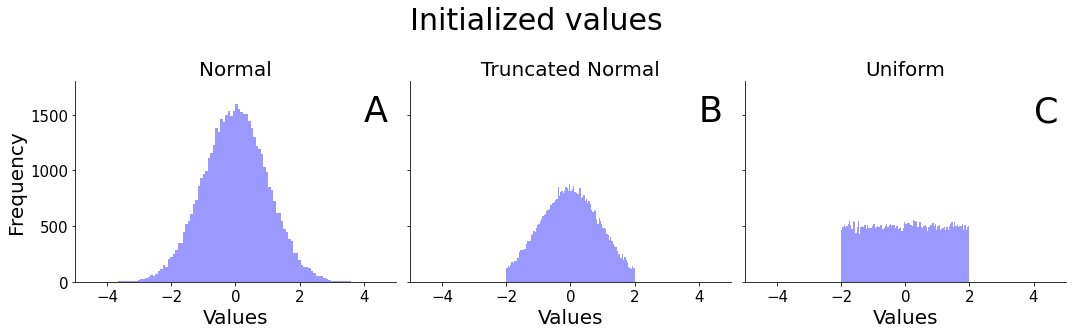

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

sess = tf.compat.v1.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.compat.v1.random_normal((1,50000),mean,std).eval()
x_truncated = tf.compat.v1.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.compat.v1.random_uniform((1,50000),minval,maxval).eval()

sess.close()


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1800])
    
    simpleaxis(ax)
    
    
axarr[0].set_ylabel('Frequency',fontsize=20)
plt.suptitle('Initialized values',fontsize=30, y=1.15)


for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

plt.savefig('histograms.png', bbox_inches='tight', format='png', dpi=200, pad_inches=0,transparent=True)

plt.show()

In [13]:
sess = tf.compat.v1.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5) 
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [0. 1. 2. 3. 4.]



### Matrix multiplication

In [14]:
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(a.get_shape())

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)

sess = tf.compat.v1.InteractiveSession()
print('matmul result:\n {}'.format(b.eval()))
sess.close()

()
(3,)
(3, 1)
matmul result:
 [[ 4]
 [10]]


### Names  

In [15]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)

c:0
c_1:0


### Name scopes

In [16]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


### Variables


In [17]:
init_val = tf.compat.v1.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32>

post run: 
[[ 2.6607962   1.3330284  -0.43936658 -2.1085098   0.87560916]]


### New variables are created each time

In [18]:
init_val = tf.compat.v1.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_1:0' shape=(1, 5) dtype=float32>

post run: 
[[ 0.847664   -0.47337502 -1.6788101   0.0270511  -0.2014168 ]]


### Placeholders

In [19]:
x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1) 

with tf.Graph().as_default():
    x = tf.compat.v1.placeholder(tf.float32,shape=(5,10))
    w = tf.compat.v1.placeholder(tf.float32,shape=(10,1))
    b = tf.fill((5,1),-1.) 
    xw = tf.matmul(x,w)

    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.compat.v1.Session() as sess:
        outs = sess.run(s,feed_dict={x: x_data,w: w_data}) 

print("outs = {}".format(outs))

outs = 2.1630358695983887


### Example 1: Linear Regression

In [20]:
# === Create data and simulate results =====
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise = np.random.randn(1,2000)*0.1
y_data = np.matmul(w_real,x_data.T) + b_real + noise

In [21]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.compat.v1.placeholder(tf.float32,shape=[None,3])
    y_true = tf.compat.v1.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)

    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.compat.v1.global_variables_initializer()
    with tf.compat.v1.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if step % 5 == 0:
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

0 [array([[0.2967314 , 0.49932396, 0.09801952]], dtype=float32), -0.21075837]
5 [array([[0.29732484, 0.5022053 , 0.10135519]], dtype=float32), -0.20453477]
10 [array([[0.29732484, 0.5022053 , 0.10135519]], dtype=float32), -0.20453477]


### Example 2: Logistic Regression


In [22]:
N = 20000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# === Create data and simulate results =====
x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real,x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1,y_data_pre_noise)

In [23]:
NUM_STEPS = 50


g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.compat.v1.placeholder(tf.float32,shape=[None,3])
    y_true = tf.compat.v1.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 
        loss = tf.reduce_mean(loss)
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)



    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.compat.v1.global_variables_initializer()
    with tf.compat.v1.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if step % 5 == 0:
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

        print(50, sess.run([w,b]))

0 [array([[0.03167085, 0.05835236, 0.01394451]], dtype=float32), -0.022824988]
5 [array([[0.14142576, 0.2596433 , 0.06205157]], dtype=float32), -0.10141636]
10 [array([[0.2012243 , 0.36843544, 0.08807053]], dtype=float32), -0.14367683]
15 [array([[0.235201  , 0.4297977 , 0.10276672]], dtype=float32), -0.16734682]
20 [array([[0.2550515 , 0.46541256, 0.11131163]], dtype=float32), -0.1809791]
25 [array([[0.26684365, 0.48644537, 0.11636755]], dtype=float32), -0.1889678]
30 [array([[0.27391753, 0.49899632, 0.11939023]], dtype=float32), -0.19369988]
35 [array([[0.2781852 , 0.5065327 , 0.12120849]], dtype=float32), -0.19652194]
40 [array([[0.28076836, 0.5110752 , 0.12230621]], dtype=float32), -0.19821225]
45 [array([[0.28233477, 0.5138194 , 0.12297034]], dtype=float32), -0.19922759]
50 [array([[0.28313142, 0.51521057, 0.12330744]], dtype=float32), -0.1997399]
